<h1 align="center">Kernelised Ridge Regression</h1>

<p>In machine learning, kernel methods can be described as a class of algorithms which can be used for pattern analysis. The kernel functions enables to perform in a high dimensional feature space where it just computes the inner products of all the data pairs in the feature space. This approach is defined as" Kernel trick".</p>

<p>Ridge Regression is a method which performs linear least squares with I2-normal regularization.the Ridge regression is expressed as</p>
<h4 align="center"> β=(XX^T+ʎI)^-1(X^T*y)</h4>

Kernel Ridge regression will combine the ridge regression with the kernel trick. So in this, it will learn a linear function inside the space which includes respective kernel and the data.The kernel Ridge Regression is expressed as</p>
<h4 align="center"> Y=K(x)^T(K+λI)^-1*t </h4>
<p> In our project, we are going to implement three types of kernels namely Linear, Polynomial and Gaussian. then we compare the performance of three models against each other. Also we compare the performance of each model with the existing API functions(we are using Sklearn). Then we plot the graph on a trivial dataset for each model and check classification of the new data</p>


In [169]:
#import all packages needed for program
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.kernel_ridge import KernelRidge 
import matplotlib.patches as mpatches
%matplotlib inline

<p>We are using Abalone dataset for our implementation, which predicts the number of rings in the abalone. From the number of rings we can predict the age of the abalone. We have considered 7 features in our dataset like Length, Diameter, Whole weight, Height, Shucked weight, Viscera weight, Shell weight for our implementation. We have also added a Bias term for better fitting of the data.The number of rings is given by our response variable which is used to predict the age.We have only considered 800 data points from this huge dataset for our implementation.</p>

<p>Then we are converting the dataframe into matrix.</p>


In [150]:
#Reading features and response from two different csv files using pandas 
dataset=pd.read_csv("/home/sathyanarayanan/features.csv")
dataset["BIAS"]=1
response=pd.read_csv("/home/sathyanarayanan/response.csv")
#taking 800 samples points from the original dataset
X=X[0:800,:]
Y=Y[0:800,:]
#converting pandas dataframe to matrix
X=np.asmatrix(X)
Y=np.asmatrix(Y)

Here we split the dataset into train and test datapoints.

In [4]:
#Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<p>Linear kernel can be expressed as</p> 
 <h4 align="center">k(X,X’)=X^T*X’ </h4>
  <p align> where X is our training data and X' is our test data for k(X). Then we find K which takes the training data and performs linear kernel. We are computing Y=K(x)T(K+λI)-1.t for calculating our predicted response.</p>
  <p align> Since we are using gridsearchCV we perform these computations inside fit method of the regressor.We do 5 fold cross validation and tuning of hyper parameters using grid search.  We calculate R square as performance metric. </p>
  
 

In [5]:
#Creating class for linear kernel to perform gridsearchcv
class Linear_kernel(BaseEstimator, RegressorMixin):
    
    def __init__(self,lamda=0.5):
        
        self.lamda=lamda
        
    def fit(self,X_train,Y_train):
        
        k= X_train * np.transpose(X_train)

        shape_r,shape_c=k.shape

        Identity=(np.identity(shape_r))

        lamdaI=self.lamda*Identity

        Second=np.linalg.pinv(k+lamdaI)

        k_x= X_train * np.transpose(X_test)

        k_x_tran=np.transpose(k_x)

        res= np.dot(k_x_tran, Second)

        self.y_pred_lin_ourmodel=np.dot(res,Y_train)
        
        return self
    
    def score(self,X_train,Y_train):
        # R squared is used as a metric
        score_linear_ourmodel=sklearn.metrics.r2_score(Y_test, self.y_pred_lin_ourmodel)
        
        return score_linear_ourmodel 

In [6]:
#parameter tuning
tuned_params_linear = {"lamda" : [1e0,0.1,1e-2,1e-3,0.5,2,3,5]}

In [7]:
#Performing GridSearch
grid_lin = GridSearchCV(Linear_kernel(), tuned_params_linear, cv=5)

In [8]:
#Invoking the linear regrressor
grid_lin.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Linear_kernel(lamda=0.5),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'lamda': [1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [9]:
grid_lin.grid_scores_

[mean: 0.50418, std: 0.00269, params: {'lamda': 1.0},
 mean: 0.52951, std: 0.00192, params: {'lamda': 0.1},
 mean: 0.52583, std: 0.00199, params: {'lamda': 0.01},
 mean: 0.52429, std: 0.00212, params: {'lamda': 0.001},
 mean: 0.51672, std: 0.00243, params: {'lamda': 0.5},
 mean: 0.48969, std: 0.00264, params: {'lamda': 2},
 mean: 0.48156, std: 0.00245, params: {'lamda': 3},
 mean: 0.47257, std: 0.00213, params: {'lamda': 5}]

In [10]:
grid_lin.best_params_

{'lamda': 0.1}

In [11]:
print("The R squared value of Linear kernel is "+ str(grid_lin.best_score_))

The R squared value of Linear kernel is 0.5295132699593408


<p>Polynomial kernel: This kernel represents the similarity of training data in feature space over the polynomials of original variables. The polynomial kernel can be expressed as</p>
 <h4>k(x,x’)=(γxTx’+r)M</h4>
<p>We use grid search to perform kfold cross validation and tuning of hyper parameters, gamma(γ), lamda (λ),‘M ‘ (degree of polynomial) and we have taken r=’1’</p>


In [12]:
class Polynomial_kernel(BaseEstimator, RegressorMixin):
    
    def __init__(self,lamda=0.5,gamma=1,m=3):
        
        self.lamda=lamda
        self.gamma=gamma
        self.m=m
        
    def fit(self,X_train,Y_train):
        
        k = self.gamma * (X_train * np.transpose(X_train))
        
        nrows,ncols=k.shape
        r=np.ones(nrows)
        a= np.power((k+r),self.m)
        
        Identity=(np.identity(nrows))
        lamdaI=self.lamda*Identity
        Second=np.linalg.pinv(a+lamdaI)

        k_x= self.gamma * (X_train * np.transpose(X_test))
        nrows1,ncols1=k_x.shape
        r1=np.ones((nrows1,ncols1))
        k_x_tran=np.transpose(np.power((k_x+r1),self.m))

        res=np.dot(k_x_tran,Second)
        self.y_pred_poly_ourmodel=np.dot(res,Y_train)

        return self
    
    def score(self,X_train,Y_train):
        
        score_poly_ourmodel=sklearn.metrics.r2_score(Y_test, self.y_pred_poly_ourmodel)
        return score_poly_ourmodel 

In [13]:
tuned_params_poly = {"lamda":[1e0,0.1,1e-2,1e-3,0.5,2,3,5], "gamma":[0.001,0.0001,0.01,0.1,1,0.5,2,3],'m':[2,3,4,10,100,6]}

In [14]:
grid_poly = GridSearchCV(Polynomial_kernel(), tuned_params_poly, cv=5)

In [15]:
grid_poly.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Polynomial_kernel(gamma=1, lamda=0.5, m=3), fit_params={},
       iid=True, n_jobs=1,
       param_grid={'m': [2, 3, 4, 10, 100, 6], 'gamma': [0.001, 0.0001, 0.01, 0.1, 1, 0.5, 2, 3], 'lamda': [1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [16]:
grid_poly.grid_scores_

[mean: 0.17763, std: 0.00595, params: {'m': 2, 'gamma': 0.001, 'lamda': 1.0},
 mean: 0.23144, std: 0.00666, params: {'m': 3, 'gamma': 0.001, 'lamda': 1.0},
 mean: 0.27153, std: 0.00692, params: {'m': 4, 'gamma': 0.001, 'lamda': 1.0},
 mean: 0.38241, std: 0.00599, params: {'m': 10, 'gamma': 0.001, 'lamda': 1.0},
 mean: 0.46550, std: 0.00250, params: {'m': 100, 'gamma': 0.001, 'lamda': 1.0},
 mean: 0.32593, std: 0.00683, params: {'m': 6, 'gamma': 0.001, 'lamda': 1.0},
 mean: 0.42685, std: 0.00442, params: {'m': 2, 'gamma': 0.001, 'lamda': 0.1},
 mean: 0.44119, std: 0.00336, params: {'m': 3, 'gamma': 0.001, 'lamda': 0.1},
 mean: 0.44751, std: 0.00269, params: {'m': 4, 'gamma': 0.001, 'lamda': 0.1},
 mean: 0.45984, std: 0.00165, params: {'m': 10, 'gamma': 0.001, 'lamda': 0.1},
 mean: 0.51676, std: 0.00144, params: {'m': 100, 'gamma': 0.001, 'lamda': 0.1},
 mean: 0.45352, std: 0.00196, params: {'m': 6, 'gamma': 0.001, 'lamda': 0.1},
 mean: 0.46933, std: 0.00202, params: {'m': 2, 'gamma': 0.

In [17]:
grid_poly.best_params_

{'gamma': 0.5, 'lamda': 0.01, 'm': 3}

In [18]:
print("The R squared value of polynomial kernel is "+ str(grid_poly.best_score_))

The R squared value of polynomial kernel is 0.5471163251874198


Gaussian kernel: The Gaussian kernel function is expressed as
 <p align = center> k(x,x’)= exp(│| x-x’|│2/ 2σ2)</p>
 
<p align>We use grid search to perform kfold cross validation and tuning of hyper parameters, sigma(σ) and lamda (λ).</p>


In [29]:
#function for computing gaussian kernel
def gauss_ker(x,z,sigma):
    sq_dist=np.sum((x-z)**2)
    return (np.exp(-sigma*sq_dist))

In [171]:
class Gaussian_kernel(BaseEstimator, RegressorMixin):
    
    def __init__(self,lamda=0.5,sigma=0.1):
        
        self.lamda=lamda
        self.sigma=sigma
        
    def fit(self,X_train,Y_train):
        
        A=np.squeeze(np.asarray(X_train))
        B=np.squeeze(np.asarray(X_test))
        m,n=X_train.shape
        c,d=X_test.shape
        
        k=np.zeros((m,m))
        for i in range(len(X_train)):
            for j in range(len(X_train)):
                k[i][j]=gauss_ker(A[i],A[j],self.sigma)
        
        shape_r,shape_c=k.shape
        Identity=(np.identity(shape_r))
        lamdaI=self.lamda*Identity
        Second=np.linalg.pinv(k+lamdaI)

        k1=np.zeros((m,c))
        for i in range(len(X_test)):
            for j in range(len(X_train)):
                k1[j][i]=gauss_ker(A[j],B[i],self.sigma)
        
        k1_tran=np.transpose(k1)
        
        res=np.dot(k1_tran,Second)
        self.y_pred_gauss_ourmodel=np.dot(res,Y_train)

        return self
    
    def score(self,X_train,Y_train):
        
        score_gauss_ourmodel=sklearn.metrics.r2_score(Y_test, self.y_pred_gauss_ourmodel)
        return score_gauss_ourmodel 

In [172]:
#Range of values for lamda and sigma 
tuned_params_gauss={"lamda":[1e0,0.1,1e-2,1e-3,0.5,2,3,5], "sigma":[0.001,0.0001,0.01,0.1,1,0.5,2,3,10]}

In [173]:
grid_gauss = GridSearchCV(Gaussian_kernel(), tuned_params_gauss, cv=5)

In [174]:
#Fitting the X train, Y_train
grid_gauss.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Gaussian_kernel(lamda=0.5, sigma=0.1), fit_params={},
       iid=True, n_jobs=1,
       param_grid={'lamda': [1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5], 'sigma': [0.001, 0.0001, 0.01, 0.1, 1, 0.5, 2, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [175]:
# Calculate the scores
grid_gauss.grid_scores_

[mean: 0.17508, std: 0.00599, params: {'lamda': 1.0, 'sigma': 0.001},
 mean: 0.02132, std: 0.00257, params: {'lamda': 1.0, 'sigma': 0.0001},
 mean: 0.43068, std: 0.00454, params: {'lamda': 1.0, 'sigma': 0.01},
 mean: 0.49273, std: 0.00132, params: {'lamda': 1.0, 'sigma': 0.1},
 mean: 0.52344, std: 0.00363, params: {'lamda': 1.0, 'sigma': 1},
 mean: 0.51895, std: 0.00139, params: {'lamda': 1.0, 'sigma': 0.5},
 mean: 0.52666, std: 0.00724, params: {'lamda': 1.0, 'sigma': 2},
 mean: 0.52412, std: 0.00968, params: {'lamda': 1.0, 'sigma': 3},
 mean: 0.48406, std: 0.01515, params: {'lamda': 1.0, 'sigma': 10},
 mean: 0.42713, std: 0.00445, params: {'lamda': 0.1, 'sigma': 0.001},
 mean: 0.17564, std: 0.00589, params: {'lamda': 0.1, 'sigma': 0.0001},
 mean: 0.47662, std: 0.00189, params: {'lamda': 0.1, 'sigma': 0.01},
 mean: 0.52869, std: 0.00124, params: {'lamda': 0.1, 'sigma': 0.1},
 mean: 0.54702, std: 0.00437, params: {'lamda': 0.1, 'sigma': 1},
 mean: 0.54271, std: 0.00279, params: {'lamda

In [176]:
#Prints the best values for hyperparameters
grid_gauss.best_params_

{'lamda': 0.01, 'sigma': 1}

<p align> R square is maximum for gaussian kernel for our model </p>

In [177]:
print("The R squared value of gaussian kernel is "+ str(grid_gauss.best_score_))

The R squared value of gaussian kernel is 0.5535131948710023


<p align><b>We use Kernel Ridge library from sklearn for comparing our algorithm with the machine learning algorithm</b></p>
<p align><b>We again use gridsearchcv for machine learning methods and do 5 fold cross validation and tuning of hyperparameters for all three models</b></p>

In [154]:
#Using Sklearn library to implement Linear Kernel
grid_linear_sk=GridSearchCV(KernelRidge(kernel='linear'), param_grid={'alpha':[1e0,0.1,1e-2,1e-3,0.5,2,3,5]}, cv=5)

In [155]:
grid_linear_sk.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [156]:
grid_linear_sk.best_params_

{'alpha': 0.01}

In [157]:
y_pred_lin_sk=grid_linear_sk.predict(X_test)

In [158]:
score_lin=sklearn.metrics.r2_score(Y_test, y_pred_lin_sk)

In [159]:
print("The R squared value of linear kernel is "+ str(score_lin))

The R squared value of linear kernel is 0.526684877904


In [160]:
grid_polynomial_sk= GridSearchCV(KernelRidge(kernel="polynomial", degree=3), cv=5, param_grid={"alpha":[1e0,0.1,1e-2,1e-3,0.5,2,3,5], "gamma":[0.001,0.0001,0.01,0.1,1,0.5,2,3]})

In [161]:
grid_polynomial_sk.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5], 'gamma': [0.001, 0.0001, 0.01, 0.1, 1, 0.5, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [162]:
grid_polynomial_sk.best_params_

{'alpha': 0.01, 'gamma': 0.5}

In [163]:
y_pred_poly_sk=grid_polynomial_sk.predict(X_test)

In [164]:
score_poly=sklearn.metrics.r2_score(Y_test, y_pred_poly_sk)
print("The R squared value of polynomial kernel is "+ str(score_poly))

The R squared value of polynomial kernel is 0.548785519754


In [165]:
grid_gaussian_sk= GridSearchCV(KernelRidge(kernel="rbf"), cv=5, param_grid={"alpha":[1e0,0.1,1e-2,1e-3,0.5,2,3,5], "gamma":[0.001,0.0001,0.01,0.1,1,0.5,2,3,10]})

In [166]:
grid_gaussian_sk.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='rbf',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5], 'gamma': [0.001, 0.0001, 0.01, 0.1, 1, 0.5, 2, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [167]:
grid_gaussian_sk.best_params_

{'alpha': 0.1, 'gamma': 0.5}

In [168]:
y_pred_gauss_sk=grid_gaussian_sk.predict(X_test)

In [169]:
score_gauss=sklearn.metrics.r2_score(Y_test, y_pred_gauss_sk)
print("The R squared value of gaussian kernel is "+ str(score_gauss))

The R squared value of gaussian kernel is 0.544719812409


<p align><b>We also plot the graph for all 3 models taking trivial data points from our dataset</b></p>
<p align><b>We plot the graph for height of the Abalone against the number of rings.</b></p> 

In [164]:
#sample data for plotting graph with few datapoints
sample_x_train=X[0:100,3]
sample_y_train=Y[0:100,0]
sample_x_test=X[200:300,3]
sample_y_test=Y[200:300,0]

In [165]:
## linear kernel 
def linearker(X_train,Y_train,X_test):
    k= X_train * np.transpose(X_train)
    shape_r,shape_c=k.shape
    lamda=0.01
    Identity=(np.identity(shape_r))
    lamdaI=lamda*Identity
    Second=np.linalg.pinv(k+lamdaI)
    k_x= X_train * np.transpose(X_test)
    k_x_tran=np.transpose(k_x)
    res= np.dot(k_x_tran, Second)
    y_pred=np.dot(res,Y_train)
    return y_pred 

In [166]:
predicted_y_linear=linearker(sample_x_train,sample_y_train,sample_x_test)

The R squared value of linear kernel is 0.109946771406


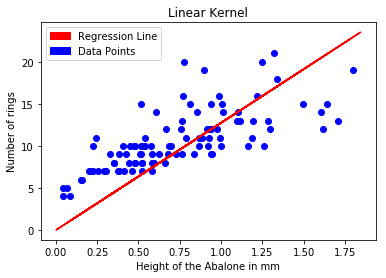

In [171]:
#graph plotting 
plt.scatter(np.squeeze(np.asarray(sample_x_train)),np.squeeze(np.asarray(sample_y_train)),c="blue")
plt.plot(np.squeeze(np.asarray(sample_x_test)),np.squeeze(np.asarray(predicted_y_linear)),c = "red")
plt.title("Linear Kernel")
plt.xlabel("Height of the Abalone in mm")
plt.ylabel("Number of rings")
red_patch = mpatches.Patch(color='red', label='Regression Line')
blue_patch = mpatches.Patch(color='blue', label='Data Points')
plt.legend(handles=[red_patch,blue_patch])
score_lin1=sklearn.metrics.r2_score(sample_y_test, predicted_y_linear)
print("The R squared value of linear kernel is "+ str(score_lin1))



In [160]:
#graph plotting for polynomial kernel
def polyker(X_train,Y_train,X_test):
    gamma=0.5
    k_second_poly= X_train * np.transpose(X_train)
    prod1= gamma * k_second_poly
    shape_poly_r,shape_poly_c=k_second_poly.shape
    r=np.ones(shape_poly_r)
    add_poly= np.power((prod1+r),3)
    lamda_poly=0.01
    Identity_poly=(np.identity(shape_poly_r))
    lamdaI_poly=lamda_poly*Identity_poly
    Second_poly=np.linalg.pinv(add_poly+lamdaI_poly)
    k_first_poly= X_train * np.transpose(X_test)
    prod1_poly= gamma * k_first_poly
    shape_poly_r1,shape_poly_c1=k_first_poly.shape
    r1=np.ones((shape_poly_r1,shape_poly_c1))
    res1_poly=np.transpose(np.power((prod1_poly+r1),3))
    first_product_poly=np.dot(res1_poly,Second_poly)
    pred_y_poly=np.dot(first_product_poly,Y_train)
    return pred_y_poly


In [161]:
predicted_y_poly=polyker(sample_x_train,sample_y_train,sample_x_test)

The R squared value of polynomial kernel is 0.608063244069


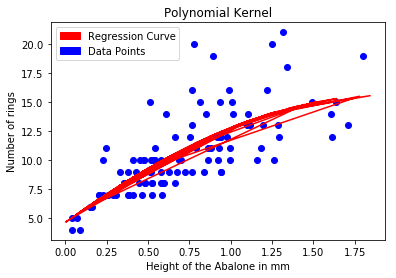

In [172]:
#graph for polynomial kernel
plt.scatter(np.squeeze(np.asarray(sample_x_train)),np.squeeze(np.asarray(sample_y_train)),c="blue")
plt.plot(np.squeeze(np.asarray(sample_x_test)),np.squeeze(np.asarray(predicted_y_poly)),c="red")
plt.title("Polynomial Kernel")
plt.xlabel("Height of the Abalone in mm")
plt.ylabel("Number of rings")
red_patch = mpatches.Patch(color='red', label='Regression Curve')
blue_patch = mpatches.Patch(color='blue', label='Data Points')
plt.legend(handles=[red_patch,blue_patch])

score_lin2=sklearn.metrics.r2_score(sample_y_test, predicted_y_poly)
print("The R squared value of polynomial kernel is "+ str(score_lin2))


In [142]:
# function for gaussian kernel graph
def gaussker(X_train,Y_train,X_test):
    sigma=0.5
    lamda_gauss =0.1
    A=np.squeeze(np.asarray(X_train))
    B=np.squeeze(np.asarray(X_test))
    m,n=X_train.shape
    c,d=X_test.shape
    k=np.zeros((m,m))
    for i in range(len(X_train)):
        for j in range(len(X_train)):
            k[i][j]=gauss_ker(A[i],A[j],sigma)
    shape_gauss_r,shape_gauss_c=k.shape
    Identity_gauss=(np.identity(shape_gauss_r))
    lamdaI_gauss=lamda_gauss*Identity_gauss
    Second_gauss=np.linalg.pinv(k+lamdaI_gauss)
    k1=np.zeros((m,c))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            k1[j][i]=gauss_ker(A[j],B[i],sigma)
    k1_tran=np.transpose(k1)
    mul1=np.dot(k1_tran,Second_gauss)
    y_pred_gauss_ourmodel=np.dot(mul1,Y_train)
    return y_pred_gauss_ourmodel


In [143]:
predicted_y_gauss=gaussker(sample_x_train,sample_y_train,sample_x_test)

The R squared value of Gaussian kernel is 0.595427726281


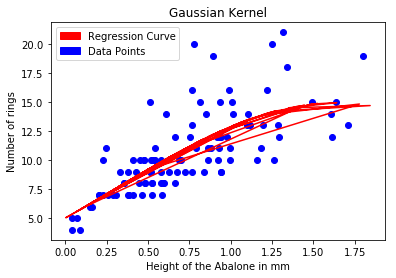

In [173]:
#graph for gaussian kernel 
plt.scatter(np.squeeze(np.asarray(sample_x_train)),np.squeeze(np.asarray(sample_y_train)),c="blue")
plt.plot(np.squeeze(np.asarray(sample_x_test)),np.squeeze(np.asarray(predicted_y_gauss)),c="red")
plt.title("Gaussian Kernel")
plt.xlabel("Height of the Abalone in mm")
plt.ylabel("Number of rings")
red_patch = mpatches.Patch(color='red', label='Regression Curve')
blue_patch = mpatches.Patch(color='blue', label='Data Points')
plt.legend(handles=[red_patch,blue_patch])
score_lin3=sklearn.metrics.r2_score(sample_y_test, predicted_y_gauss)
print("The R squared value of Gaussian kernel is "+ str(score_lin3))



<p align> <b> Conclusion:</b>From the plot we can show that gaussian and polynomial performs better than linear kernel model for our dataset.</p> 